# Import Modules

In [1]:
import scanpy as sc
import squidpy as sq
import sys
sys.path.append(r"/home/yqzhou/JUPYTER/MyPackage/Pianno")
import pianno as po
import json
from os.path import join
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data input

In [2]:
# Setting the data and configuration file storage path.
sample_name = "GT151676"
config_path = "/home/yqzhou/JUPYTER/Revision/Tutorials/" + sample_name
adata = sc.read(join(config_path, "pianno_adata.h5ad"))

# (Optional) Step1：Automatic hyper-parameter selection

In [3]:
# Specify a known marker gene for each pattern
Patterndict = dict(L1 = ['CXCL14'],
                   L2 = ['HPCAL1'],
                   L3 = ['HOPX'],
                   L4 = ['NEFH'],
                   L5 = ['PCP4'],
                   L6 = ['KRT17'],
                   WM = ['MOBP'])

Configuration path of Pianno: /home/yqzhou/JUPYTER/Revision/Tutorials/GT151676
[2024-01-17 22:31:05] Creating experiment, Experiment ID: qec9n53t
[2024-01-17 22:31:05] Starting web server...
[2024-01-17 22:31:06] Timeout, retry...
[2024-01-17 22:31:07] Timeout, retry...
[2024-01-17 22:31:08] Timeout, retry...
[2024-01-17 22:31:09] Timeout, retry...
[2024-01-17 22:31:10] Timeout, retry...
[2024-01-17 22:31:11] Timeout, retry...
[2024-01-17 22:31:12] Timeout, retry...
[2024-01-17 22:31:13] Timeout, retry...
[2024-01-17 22:31:14] Timeout, retry...
[2024-01-17 22:31:16] Setting up...
[2024-01-17 22:31:16] Web UI URLs: http://127.0.0.1:8080 http://10.10.10.18:8080 http://11.11.11.18:8080
[2024-01-17 22:41:27] Stopping experiment, please wait...
[2024-01-17 22:41:30] Experiment stopped


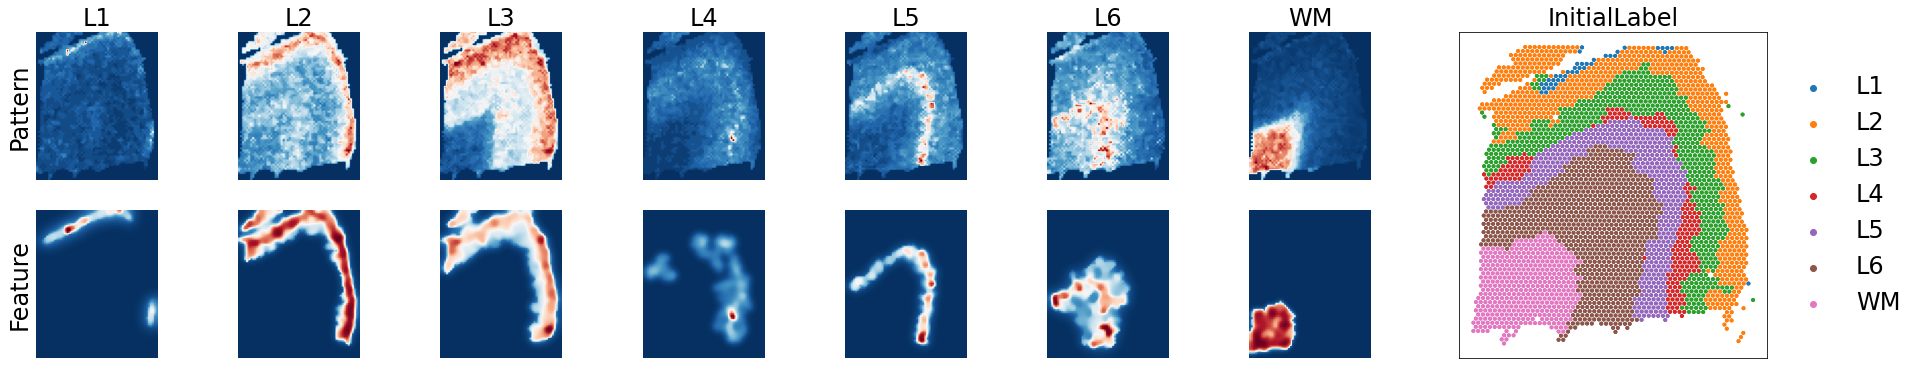

In [4]:
# If the connection fails, try a few more times.
# Open the Web UI URLs to visualize the hyperparameter tuning process.
# The default experiment lasts for a maximum of 10 minutes, 
# which can be modified according to the actual situation.
adata = po.AutoPatternRecognition(adata,
                                  Patterndict=Patterndict,
                                  config_path=config_path,
                                  param_tuning=True,
                                  max_experiment_duration='10m')

In [5]:
# Print the optimal parameters saved in the previous step.
with open(join(config_path, "best_params.json"),'r') as f:
    best_params_dict = json.load(f)
for key in best_params_dict:
    best_params = best_params_dict[key]  
best_params

{'n_class': 3,
 'dilation_radius': 1.0,
 'denoise_weight': 0.09,
 'unsharp_radius': 4.0,
 'unsharp_amount': 3.0,
 'gaussian_blur': 1.0}

# (Optional) Step2：Marker Selection

In [6]:
# Take the top 10 DEGs as candidate marker genes to make a proposed patterndict
Patterndict = po.ProposedPatterndict(adata, top_n=10)

L1
['ATP1A2', 'C1orf61', 'MT1H', 'CST3', 'MT1G', 'MT3', 'MT1M', 'MT1E', 'ALDH2', 'FABP7']


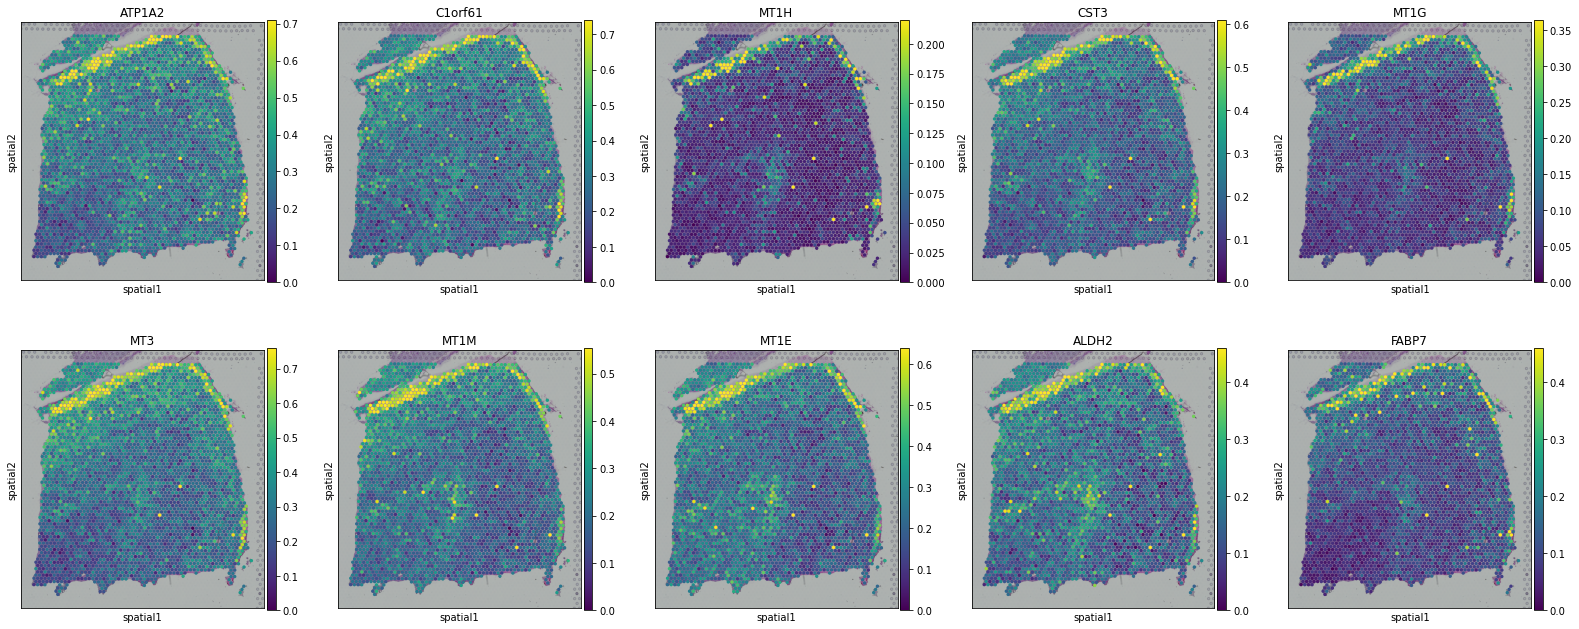

L2
['CAMK2N1', 'CARTPT', 'CALB2', 'PENK', 'CUX2', 'RELN', 'C1QL2', 'HPCAL1', 'SERPINE2', 'LAMP5']


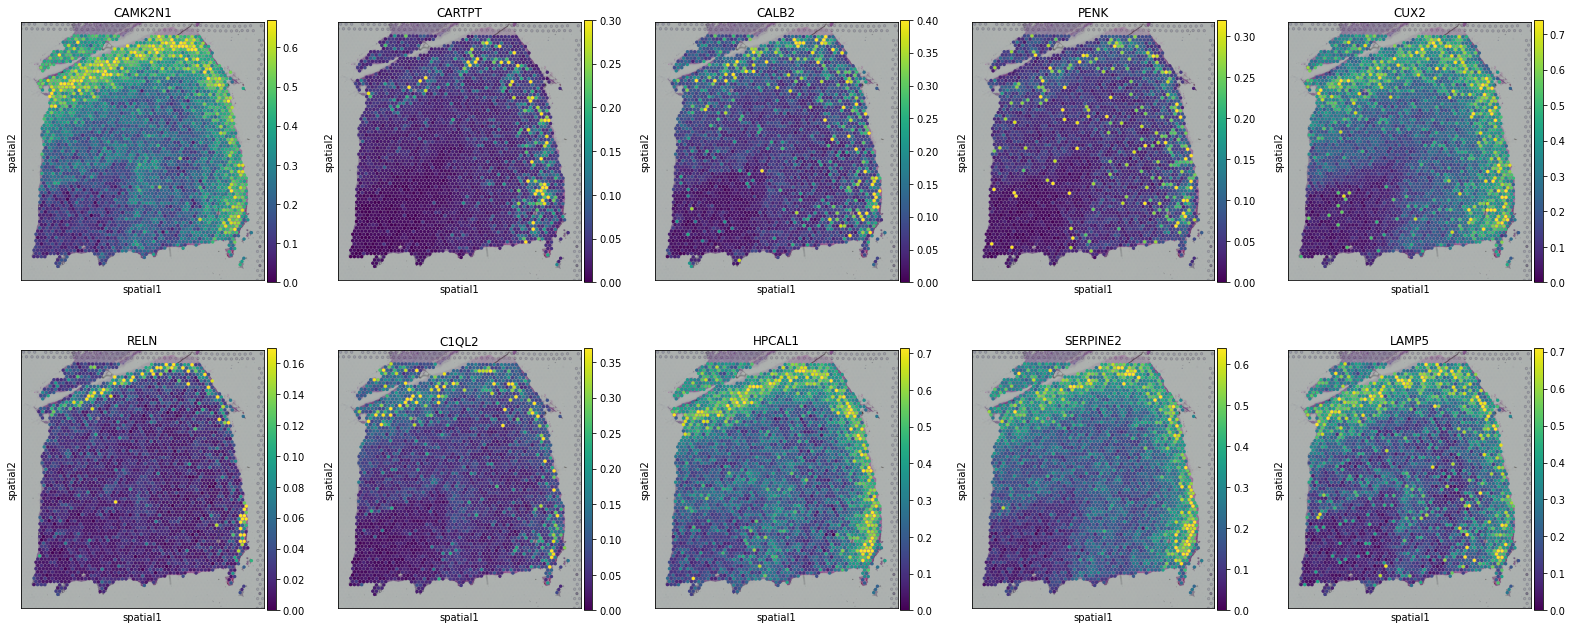

L4
['SLITRK6', 'NEFH', 'NEFM', 'SYT2']


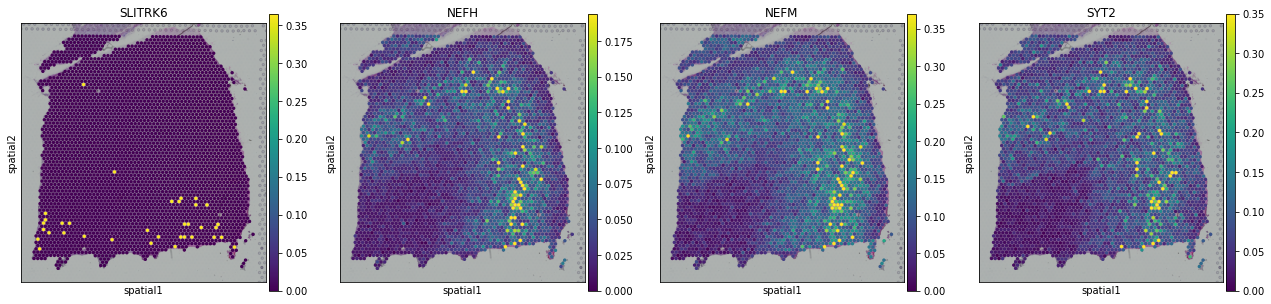

L5
['TRABD2A', 'PKD2L1', 'HTR2C', 'PCP4']


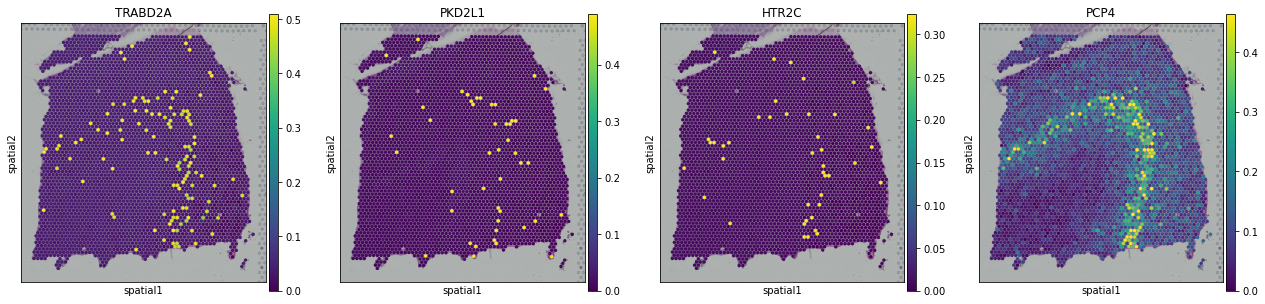

L6
['LINC02192', 'CPB1', 'IGHG3', 'KRT17', 'HBB', 'IGHM']


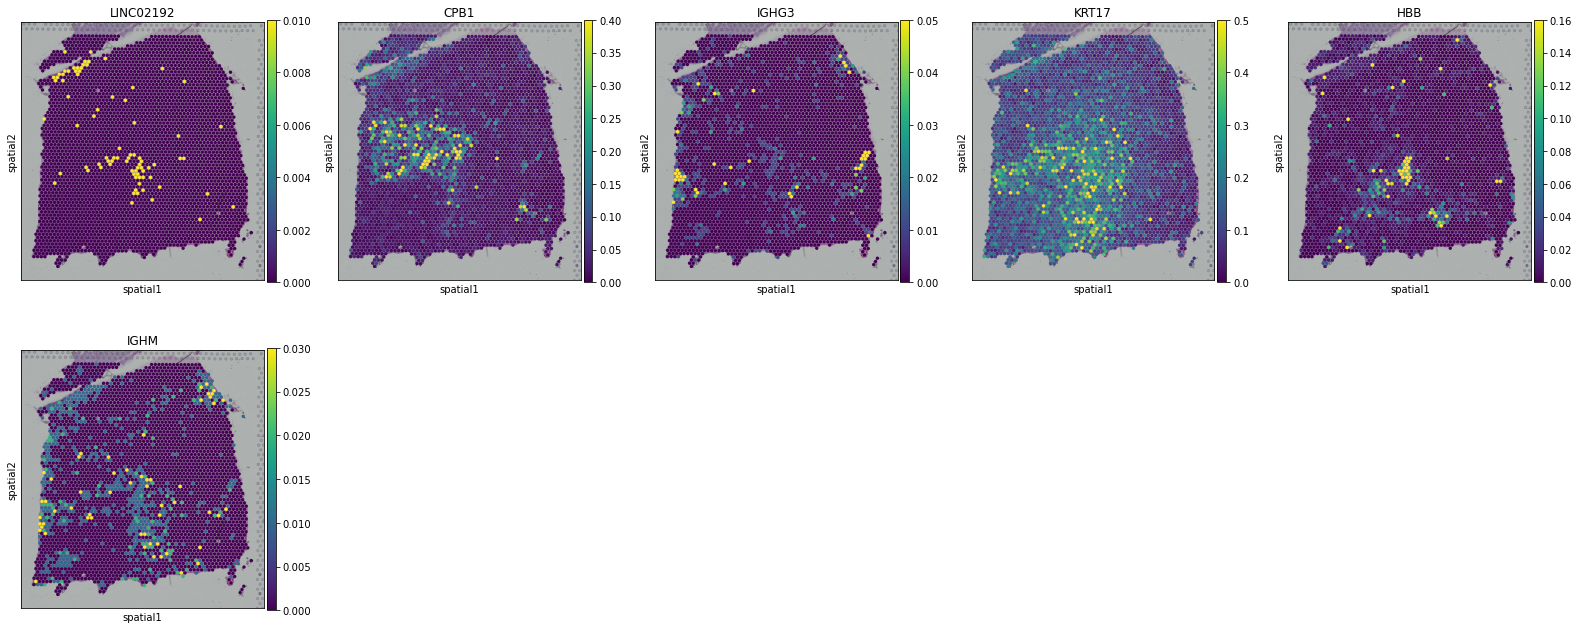

WM
['CRYAB', 'PRRG1', 'WNK1', 'MOBP', 'PKP4', 'SEPT4', 'PAQR6', 'CNTN2', 'NDRG1', 'MAP4K4']


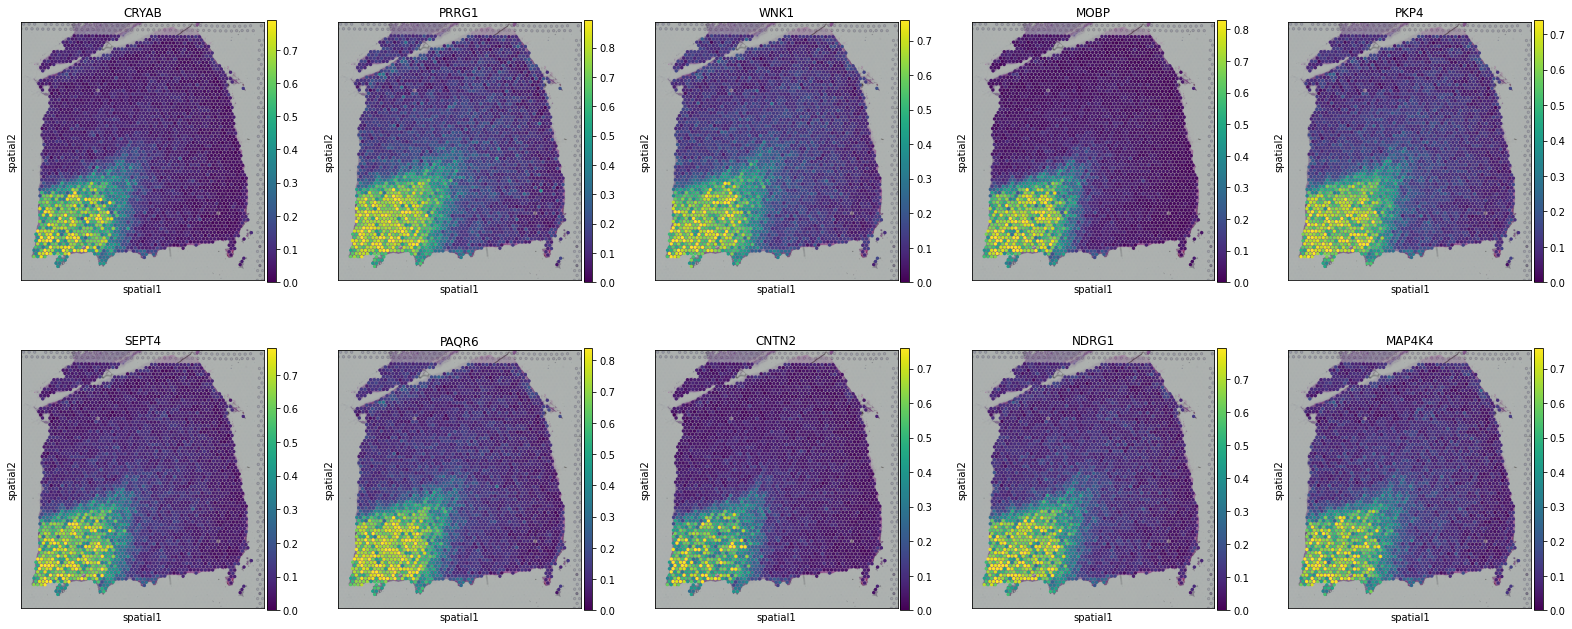

In [7]:
# Visualization of candidate marker genes
for k, v in Patterndict.items():
    print(k)
    print(v)
    with mpl.rc_context({'axes.facecolor':  'black',
                         'figure.figsize': [4.5, 5]}):
        sc.pl.spatial(adata, #cmap='magma',
                      layer='DenoisedX',
                      color=v,
                      ncols=5, size=5,
                      spot_size=25,
                      vmin=0, vmax='p99'
                     )

# Step3：Initial Pattern Recognition

In [8]:
# Construct the marker list by selecting 1-3 genes for each pattern 
# from the above candidate marker genes.
Patterndict = dict(L1 = ['CXCL14','MT3','MT1G'],
                   L2 = ['C1QL2','HPCAL1'],
                   L3 = ['HOPX'],
                   L4 = ['NEFH','SYT2','NEFM'],
                   L5 = ['PCP4'],
                   L6 = ['KRT17'],
                   WM = ['MOBP','PRRG1'])

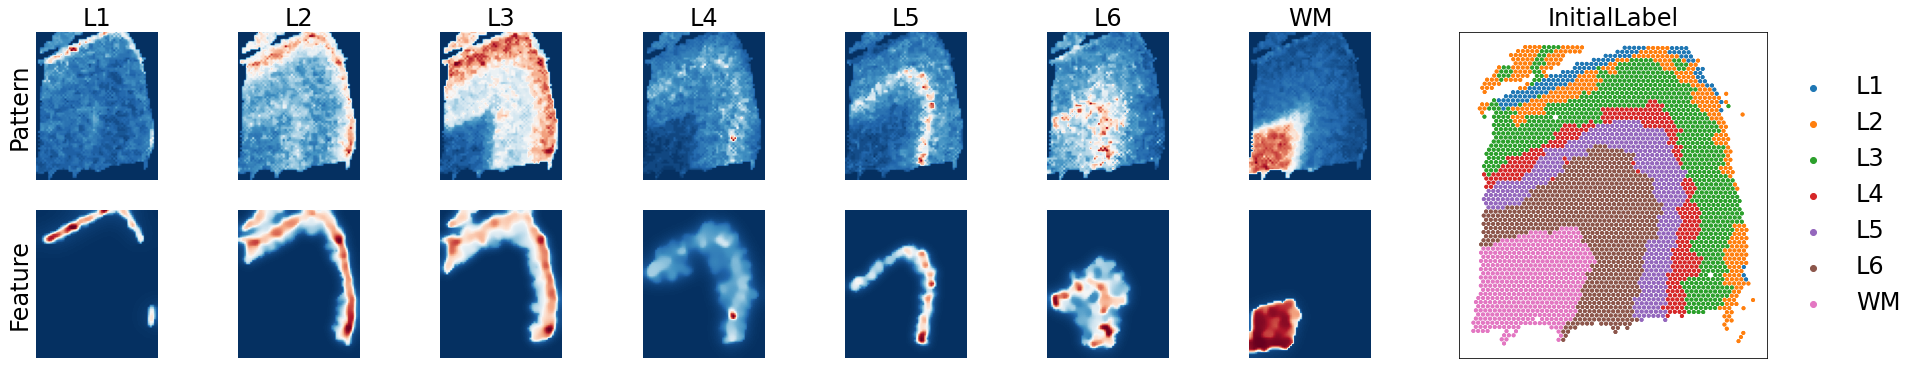

In [9]:
adata = po.AutoPatternRecognition(adata,
                                  Patterndict=Patterndict,
                                  config_path=config_path,
                                  param_tuning=False)

# Step4：Annotation Improvement

---Create Spatial Graph: Done!
---Compute Spatial Energy: Done!
---Find K-Nearest Neighbor in UMAP: Done!
---Compute KNN Energy: Done!
---Compute Global Energy: Done!


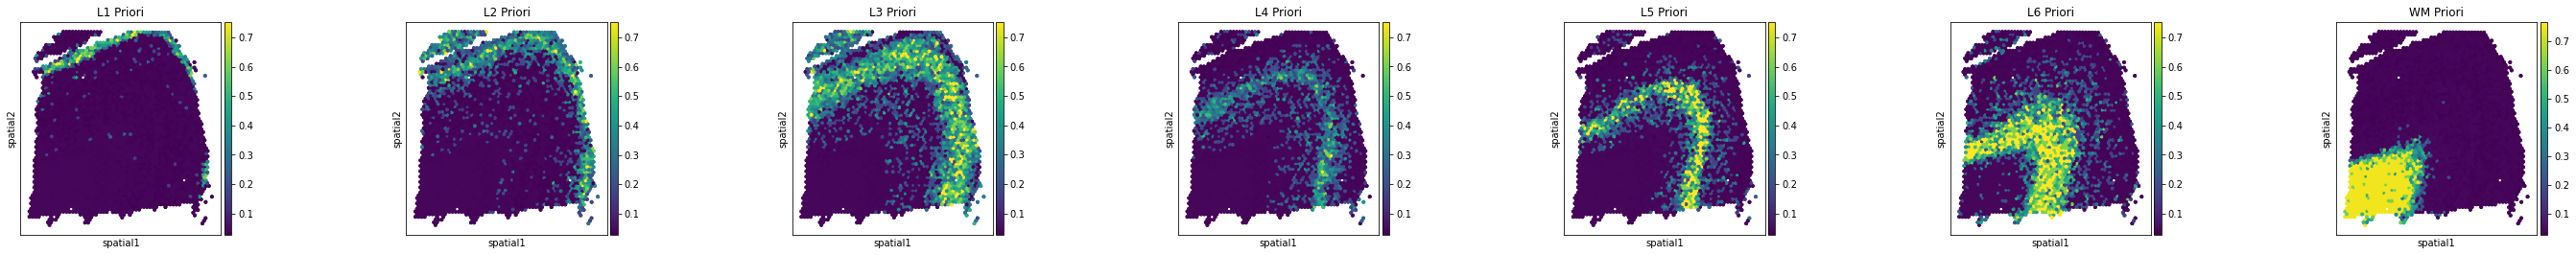

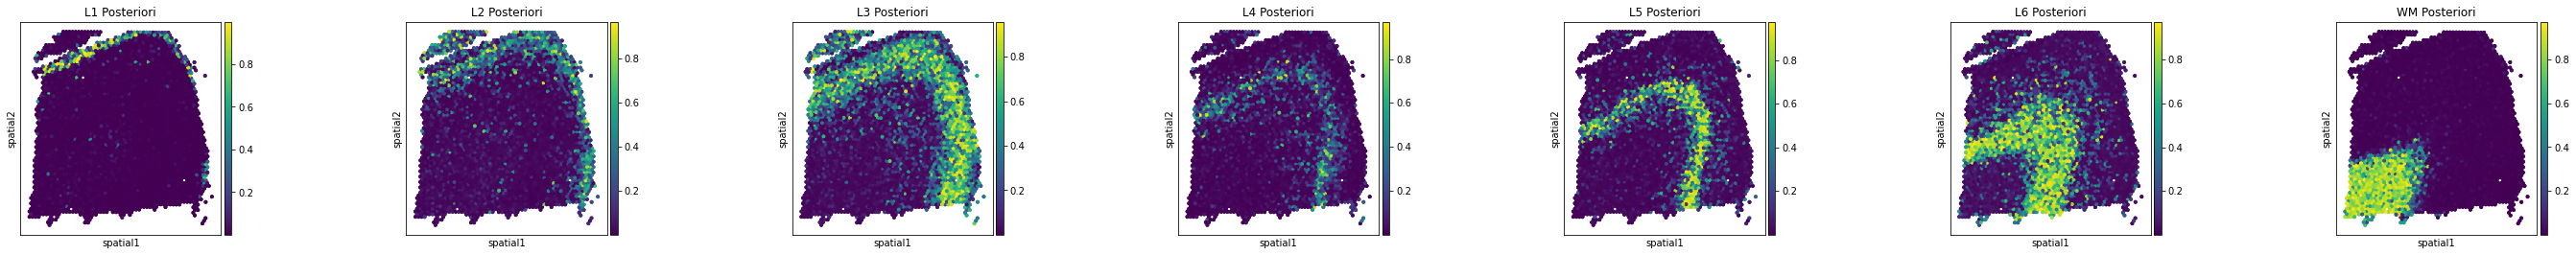

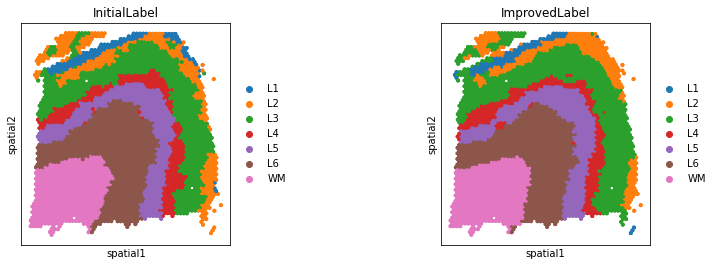

In [10]:
adata = po.AnnotationImprovement(adata)